In [10]:
import string

import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm

from letter_recognition import RNG

%matplotlib inline

letters_map = {i: string.ascii_uppercase[i] for i in range(26)}
compare_grid_size = 2

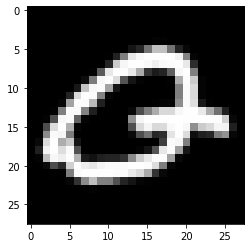

Letter: Q


In [11]:
# Raw data loading
with open("../data/raw/data.npz", "rb") as f:
    data = np.load(f)
    images = data["X"]
    labels = data["Y"]
images_raw = images.copy()

# Raw image example
i = RNG.integers(0, len(images))
fig, ax = plt.subplots()
ax.imshow(images[i, 0], cmap="gray")
plt.show()
print("Letter:", letters_map[labels[i]])

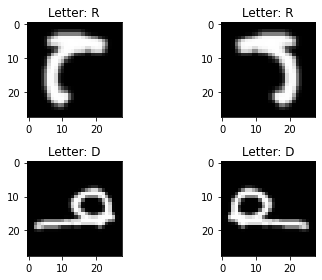

In [12]:
# Processing - flipping
images = np.flip(images, 3)

# Before/after
indices = RNG.integers(0, len(images), compare_grid_size)
fig, axs = plt.subplots(compare_grid_size, 2)
for row in range(compare_grid_size):
    i = indices[row]
    axs[row, 0].imshow(images_raw[i, 0], cmap="gray")
    axs[row, 0].set_title(f"Letter: {letters_map[labels[i]]}")
    axs[row, 1].imshow(images[i, 0], cmap="gray")
    axs[row, 1].set_title(f"Letter: {letters_map[labels[i]]}")
plt.tight_layout()
plt.show()

  0%|          | 0/145600 [00:00<?, ?it/s]

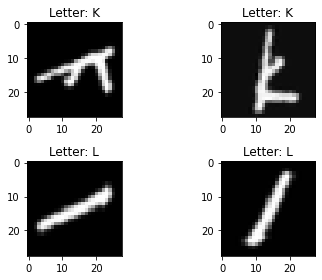

In [13]:
# Processing - rotation (+/- random angle)
for i in tqdm(range(len(images))):
    angle = RNG.integers(-15, 16)
    images[i, 0] = scipy.ndimage.rotate(images[i, 0], 90 + angle, reshape=False)
    
# Before/after
indices = RNG.integers(0, len(images), compare_grid_size)
fig, axs = plt.subplots(compare_grid_size, 2)
for row in range(compare_grid_size):
    i = indices[row]
    axs[row, 0].imshow(images_raw[i, 0], cmap="gray")
    axs[row, 0].set_title(f"Letter: {letters_map[labels[i]]}")
    axs[row, 1].imshow(images[i, 0], cmap="gray")
    axs[row, 1].set_title(f"Letter: {letters_map[labels[i]]}")
plt.tight_layout()
plt.show()

  0%|          | 0/145600 [00:00<?, ?it/s]

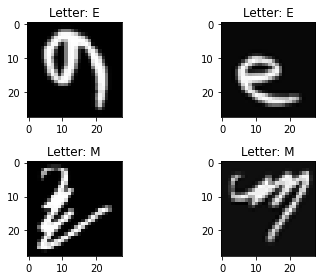

In [14]:
# Processing - resizing & moving
for i in tqdm(range(len(images))):
    scale_factor = RNG.uniform(0.5, 1.0)
    old_size = images[i, 0].shape[0]
    new_size = int(old_size * scale_factor)
    
    img = Image.fromarray(images[i, 0])
    img = img.resize((new_size, new_size))
    img = np.asarray(img)
    
    left_pad = RNG.integers(0, old_size - new_size + 1)
    right_pad = (old_size - new_size) - left_pad
    up_pad = RNG.integers(0, old_size - new_size + 1)
    down_pad = (old_size - new_size) - up_pad
    images[i, 0] = np.pad(img, ((up_pad, down_pad), (left_pad, right_pad)))  

# Before/after
indices = RNG.integers(0, len(images), compare_grid_size)
fig, axs = plt.subplots(compare_grid_size, 2)
for row in range(compare_grid_size):
    i = indices[row]
    axs[row, 0].imshow(images_raw[i, 0], cmap="gray")
    axs[row, 0].set_title(f"Letter: {letters_map[labels[i]]}")
    axs[row, 1].imshow(images[i, 0], cmap="gray")
    axs[row, 1].set_title(f"Letter: {letters_map[labels[i]]}")
plt.tight_layout()
plt.show()

Threshold: 149.45260734149136


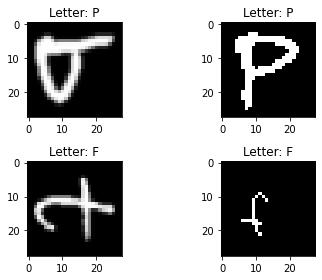

In [15]:
# Processing - binarization
threshold = ((np.max(images) + np.mean(images)) / 2) * (1 - 0.2 * (1 - np.std(images) / 128))
print("Threshold:", threshold)
images = np.where(images > threshold, 1.0, 0.0)

# Before/after
indices = RNG.integers(0, len(images), compare_grid_size)
fig, axs = plt.subplots(compare_grid_size, 2)
for row in range(compare_grid_size):
    i = indices[row]
    axs[row, 0].imshow(images_raw[i, 0], cmap="gray")
    axs[row, 0].set_title(f"Letter: {letters_map[labels[i]]}")
    axs[row, 1].imshow(images[i, 0], cmap="gray")
    axs[row, 1].set_title(f"Letter: {letters_map[labels[i]]}")
plt.tight_layout()
plt.show()

In [16]:
# Numpy saving for future uses
with open("../data/processed/data.npz", "wb") as f:
    np.savez_compressed(f, X=images, Y=labels)